In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
X = np.matrix([list(range(93, 103)), [52.33, 53.46, 54.18, 54.69, 55.04, 55.29, 56.28, 59.48, 61.81, 63.71]])
print(X)

[[ 93.    94.    95.    96.    97.    98.    99.   100.   101.   102.  ]
 [ 52.33  53.46  54.18  54.69  55.04  55.29  56.28  59.48  61.81  63.71]]


In [3]:
X_bar = np.matrix([[np.mean(X[0])]*10, [np.mean(X[1])]*10])
X_bar

matrix([[97.5  , 97.5  , 97.5  , 97.5  , 97.5  , 97.5  , 97.5  , 97.5  ,
         97.5  , 97.5  ],
        [56.627, 56.627, 56.627, 56.627, 56.627, 56.627, 56.627, 56.627,
         56.627, 56.627]])

In [4]:
np.cov(X)

array([[ 9.16666667, 10.68833333],
       [10.68833333, 14.20360111]])

In [5]:
S_inverse = np.linalg.inv(np.cov(X))
print(S_inverse)

[[ 0.88999414 -0.66972833]
 [-0.66972833  0.57438107]]


In [6]:
Mahanalobi = np.matmul(np.matmul(np.transpose(np.subtract(X, X_bar)), S_inverse), np.subtract(X, X_bar))
print(Mahanalobi)

[[ 2.72746983  2.2169169   1.48264255  0.63377918 -0.30239012 -1.29312562
  -1.88007123 -1.26110377 -1.11686227 -1.20725544]
 [ 2.2169169   1.81619929  1.20023811  0.47403022 -0.33617515 -1.19887895
  -1.67309437 -0.98709448 -0.75783094 -0.75431064]
 [ 1.48264255  1.20023811  0.80762142  0.35855456 -0.13352195 -0.65247949
  -0.97251739 -0.69848442 -0.65831646 -0.73373694]
 [ 0.63377918  0.47403022  0.35855456  0.26575547  0.19023376  0.12551041
  -0.01912083 -0.40239592 -0.69172525 -0.9346216 ]
 [-0.30239012 -0.33617515 -0.13352195  0.19023376  0.60625804  1.07995018
   1.12690016 -0.10060956 -0.8264089  -1.30423645]
 [-1.29312562 -1.19887895 -0.65247949  0.12551041  1.07995018  2.14467111
   2.39331142  0.20473796 -1.02438936 -1.77930766]
 [-1.88007123 -1.67309437 -0.97251739 -0.01912083  1.12690016  2.39331142
   2.76883466  0.48373288 -0.75397353 -1.47400177]
 [-1.26110377 -0.98709448 -0.69848442 -0.40239592 -0.10060956  0.20473796
   0.48373288  0.6840261   0.91530144  1.16188978]


In [7]:
disquare = sorted(np.diagonal(Mahanalobi))
print(disquare)

[0.26575547008043143, 0.6062580384340961, 0.6840261026608104, 0.8076214218379932, 1.8161992867927699, 2.033894308312916, 2.1446711128789855, 2.727469827008027, 2.768834663189889, 4.145269768804083]


In [18]:
chisquare = [chi2.ppf(1-x, 2) for x in [(10 - i + 0.5)/10.0 for i in range(1, 11)]]
print(chisquare)

[0.10258658877510116, 0.3250378589955499, 0.5753641449035618, 0.8615658321849088, 1.19567400151124, 1.5970153924355435, 2.0996442489973557, 2.7725887222397816, 3.794239969771762, 5.991464547107979]


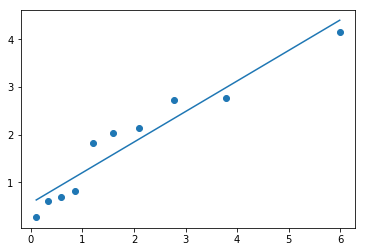

In [17]:
plt.scatter(chisquare, disquare)
plt.plot(np.unique(chisquare), np.poly1d(np.polyfit(chisquare, disquare, 1))(np.unique(chisquare)))